### Weight Conversion: 

- This notebook converts the .pkl checkpoint of the official NVIDIA implementation of StyleGAN2-Ada to weights corresponding to the custom StyleGAN2 implementation by [rosinality](https://github.com/rosinality/stylegan2-pytorch) which is used in the e4e architecture and many other inversion technique implementations. 
- For this to work, one needs to load the file [export_weights.py](https://github.com/dvschultz/stylegan2-ada-pytorch/blob/main/export_weights.py) from the stylegan2-ada-pytorch fork by [dvschulz](https://github.com/dvschultz) and place it in the official stylegan2-ada-pytorch repo by NVIDIA. 


In [1]:
import os 
os.chdir('../../stylegan2-ada-pytorch/')

In [2]:
stylegan2_ada_path = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/Stylegan2_Ada/Experiments/00003-stylegan2_ada_images-mirror-auto2-kimg1000-resumeffhq512/network-snapshot-000920.pkl"
model_save_path = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync/Models/e4e/pretrained/stylegan2_ada_zalando_germany.pt"

CMD = f"""
python export_weights.py {stylegan2_ada_path} {model_save_path}
"""
#!{CMD}

### Test the converted weights

In [4]:
os.chdir('../stylegan2-pytorch/')

import torch
from model import Generator
import PIL.Image
import matplotlib.pyplot as plt

In [5]:
if torch.cuda.is_available():
    device = 'cuda'
else: 
    device = 'cpu'

size = 512
latent = 512
n_mlp = 2
channel_multiplier = 2

# Initialize Model
g_ema = Generator(
        size, latent, n_mlp, channel_multiplier=channel_multiplier
    ).to(device)
checkpoint = torch.load(model_save_path)
g_ema.load_state_dict(checkpoint["g_ema"])

<All keys matched successfully>

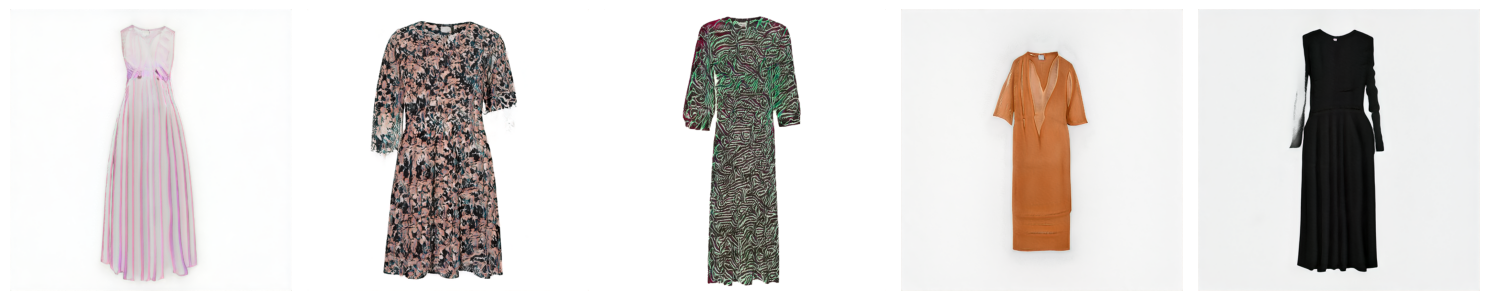

In [9]:
# Generate some examples
num_samples = 5
sample_z = torch.randn(num_samples, latent, device=device)
samples, _ = g_ema([sample_z])


fig, ax = plt.subplots(1, num_samples, figsize = (15, num_samples*6))
for i in range(num_samples):
    img = samples[i,:,:,:].reshape([1,3,512,512])
    img_perm = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    ax[i].imshow(PIL.Image.fromarray(img_perm[0].cpu().numpy(), 'RGB'))
    ax[i].axis('off')
fig.tight_layout()
plt.show()
    